# KNN
---

In [233]:
import sklearn
sklearn.__version__

'1.0.2'

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 읽기

In [235]:
citrus = pd.read_csv('./datasets/citrus.csv')
citrus.shape

(10000, 6)

In [236]:
citrus.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [237]:
citrus['name'].unique()

array(['orange', 'grapefruit'], dtype=object)

In [238]:
citrus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [239]:
citrus.isna().sum(axis=0)

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [240]:
citrus[citrus.duplicated()]

,name,diameter,weight,red,green,blue


# 몇개씩 들어있는지

In [241]:
citrus['name'].value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

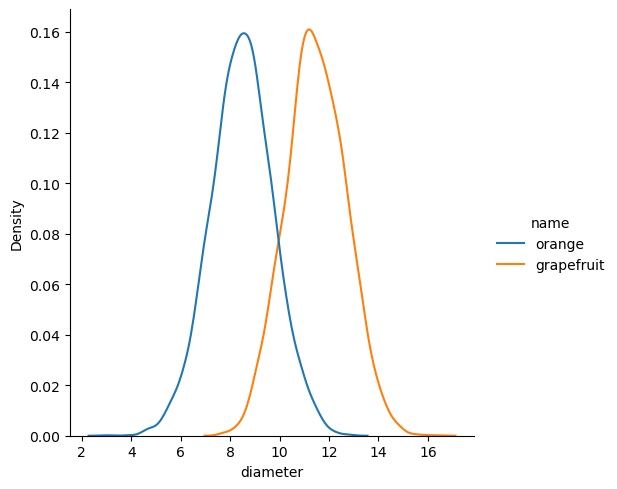

In [242]:
sns.displot(data=citrus, x='diameter', hue='name', kind='kde')

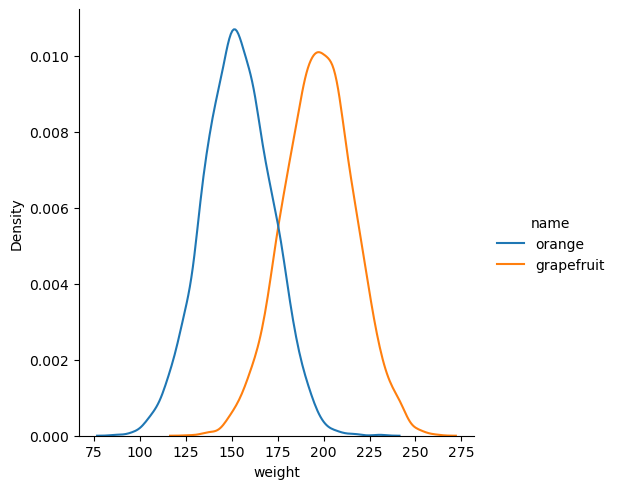

In [243]:
sns.displot(data=citrus, x='weight', hue='name', kind='kde')

## 데이터 전처리

In [244]:
df = citrus.copy()

In [245]:
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


## 레이블 인코딩

In [246]:
df['name'] = df['name'].map({'orange' : 1, 'grapefruit' : 0})
df.head()

,name,diameter,weight,red,green,blue
0,1,2.96,86.76,172,85,2
1,1,3.91,88.05,166,78,3
2,1,4.42,95.17,156,81,2
3,1,4.47,95.60,163,81,4
4,1,4.48,95.76,161,72,9


In [247]:
# sickit-learn
# LableEncoding

from sklearn.preprocessing import LabelEncoder
#데이터 전처리하는게 모여있는 패키지

le = LabelEncoder() #인코딩 클래스
le.fit(df['name']) 
#data를 집어넣어서 전처리하는 단계
# fit으로 데이터를 넘겨서 검사를 함
# predict함수를 나중에 부름

le.transform(df['name'])
# 검사를 통해 얻은 정보로 전처리하는 단계
#df['name'] = le.fit_transform(df['name'])와 동일
df.head()

,name,diameter,weight,red,green,blue
0,1,2.96,86.76,172,85,2
1,1,3.91,88.05,166,78,3
2,1,4.42,95.17,156,81,2
3,1,4.47,95.60,163,81,4
4,1,4.48,95.76,161,72,9


In [248]:
le.classes_

array([0, 1], dtype=int64)

## 데이터 분리 학습 데이터/테스트 데이터

In [249]:
# X, Y 로 분리

In [250]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
y

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: name, Length: 10000, dtype: int64

In [251]:
df.shape

(10000, 6)

In [252]:
# X,y = sklearn.utils.shuffle(X, y)

In [253]:
# # 학습 / 테스트

# # 슬라이싱 방법
# idx = int(df.shape[0] * 0.8)

# X_train = X.iloc[0:idx,:]
# X_test = X.iloc[idx:,:]

# y_train = y[:idx]
# y_test = y[idx:]

In [254]:
# 일반적으로 많이 쓰는 방법
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022, stratify=y, shuffle = True)
# random = 랜덤시드
# stratify = class 마다 개수가 상이할때 주로 사용 비슷하게 뽑으려고

In [255]:
X_train.shape, X_test.shape

((8000, 5), (2000, 5))

In [256]:
y_train.shape, y_test.shape

((8000,), (2000,))

In [257]:
y_test.value_counts()

1    1000
0    1000
Name: name, dtype: int64

## 스케일링

In [258]:
# # 표준화

# m = X_train['diameter'].mean() # 평균
# s = X_train['diameter'].std() # 표준편차

# z = (X_train['diameter'] - m)/s # 머신러닝 표준화 공식

In [259]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)

type(X_train_scaled)

numpy.ndarray

In [260]:
X_train_scaled[:5]

array([[-1.61852607, -1.60693378,  0.48456216,  1.45730586, -0.92140149],
       [-0.59932084, -0.75195291, -1.42739703, -1.02134167, -0.81169288],
       [-1.31122801, -1.31556395,  0.00657236,  0.00430558,  0.39510185],
       [ 0.35330314,  0.32573973,  1.15374787,  1.02995284,  0.8339363 ],
       [-2.12044623, -2.05508996, -0.18462356,  0.68807042,  0.61451907]])

In [261]:
y_train = y_train.to_numpy()
# or y_train = y_train.values

y_train

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

## 모델 학습

In [262]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
# hyper param 2개가 있음
# default 는 정확도 92% 정도 

clf.fit(X_train_scaled, y_train) # fit은 학습이기 때문에 (피쳐,정답값)을 넣어야 함

KNeighborsClassifier()

In [263]:
## 테스트 

X_test_scaled = ss.transform(X_test)
X_train_scaled[:5]

array([[-1.61852607, -1.60693378,  0.48456216,  1.45730586, -0.92140149],
       [-0.59932084, -0.75195291, -1.42739703, -1.02134167, -0.81169288],
       [-1.31122801, -1.31556395,  0.00657236,  0.00430558,  0.39510185],
       [ 0.35330314,  0.32573973,  1.15374787,  1.02995284,  0.8339363 ],
       [-2.12044623, -2.05508996, -0.18462356,  0.68807042,  0.61451907]])

In [264]:
# 예측 y_test
y_pred = clf.predict(X_test_scaled)

In [265]:
y_pred[:10]

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [266]:
y_test[:10]

3477    1
5504    0
6735    0
7909    0
2079    1
3590    1
4532    1
3279    1
5549    0
3583    1
Name: name, dtype: int64

In [267]:
# 정확도
(y_pred == y_test).sum() / X_test.shape[0]

0.9205

## 평가 

In [268]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
cfm

array([[915,  85],
       [ 74, 926]], dtype=int64)

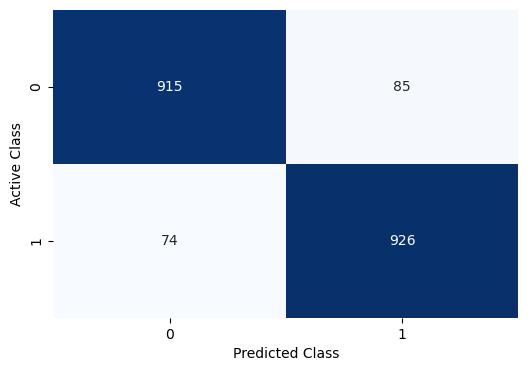

In [269]:
plt.figure(figsize=(6,4))
sns.heatmap(cfm, annot = True, fmt='g', cbar=False, cmap='Blues')
plt.ylabel("Active Class")
plt.xlabel('Predicted Class')
plt.show()

In [270]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_score(y_true, y_pred):
    print(f'정확도 : {accuracy_score(y_true, y_pred)}')
    print(f'정밀도 : {precision_score(y_true, y_pred)}')
    print(f'재현율 : {recall_score(y_true, y_pred)}')

In [271]:
print_score(y_test, y_pred)

정확도 : 0.9205
정밀도 : 0.9159248269040554
재현율 : 0.926


In [276]:
acc_scores = []
for k in range(3, 50):
    # 새로운 모델 
    model = KNeighborsClassifier(n_neighbors = k) 
    # 학습
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    # 예측 정확도
    acc_scores.append(accuracy_score(y_test, y_pred))
    
for i in range(3, 47): 
    print(f'k = {i} 일때 정확도 : {acc_scores[i]}')
print(max(acc_scores))

k = 3 일때 정확도 : 0.921
k = 4 일때 정확도 : 0.9245
k = 5 일때 정확도 : 0.9235
k = 6 일때 정확도 : 0.926
k = 7 일때 정확도 : 0.926
k = 8 일때 정확도 : 0.925
k = 9 일때 정확도 : 0.924
k = 10 일때 정확도 : 0.922
k = 11 일때 정확도 : 0.9225
k = 12 일때 정확도 : 0.9225
k = 13 일때 정확도 : 0.9225
k = 14 일때 정확도 : 0.9245
k = 15 일때 정확도 : 0.9255
k = 16 일때 정확도 : 0.924
k = 17 일때 정확도 : 0.926
k = 18 일때 정확도 : 0.923
k = 19 일때 정확도 : 0.9245
k = 20 일때 정확도 : 0.9275
k = 21 일때 정확도 : 0.9265
k = 22 일때 정확도 : 0.929
k = 23 일때 정확도 : 0.929
k = 24 일때 정확도 : 0.93
k = 25 일때 정확도 : 0.931
k = 26 일때 정확도 : 0.93
k = 27 일때 정확도 : 0.93
k = 28 일때 정확도 : 0.9285
k = 29 일때 정확도 : 0.93
k = 30 일때 정확도 : 0.928
k = 31 일때 정확도 : 0.9305
k = 32 일때 정확도 : 0.9295
k = 33 일때 정확도 : 0.9295
k = 34 일때 정확도 : 0.93
k = 35 일때 정확도 : 0.9295
k = 36 일때 정확도 : 0.9285
k = 37 일때 정확도 : 0.93
k = 38 일때 정확도 : 0.929
k = 39 일때 정확도 : 0.93
k = 40 일때 정확도 : 0.9285
k = 41 일때 정확도 : 0.9285
k = 42 일때 정확도 : 0.9275
k = 43 일때 정확도 : 0.9285
k = 44 일때 정확도 : 0.928
k = 45 일때 정확도 : 0.928
k = 46 일때 정확도 : 0.928
0.931


In [277]:
np.argmax(acc_scores)

25

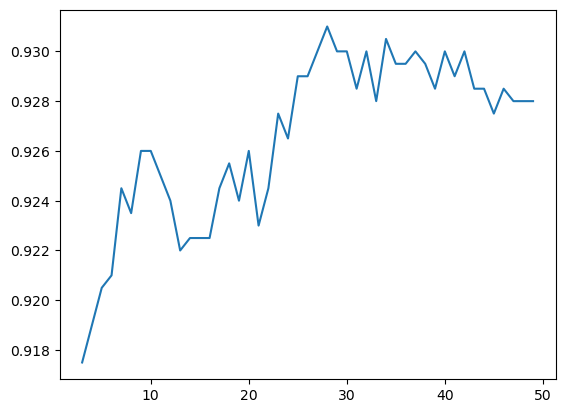

In [278]:
plt.plot(range(3,50), acc_scores)
plt.show()

## K-Fold
---
* 학습이 잘 되었는가 확인

In [279]:
X_train_scaled.shape

(8000, 5)

In [286]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=2022)

acc_scores = []
for train_idx, val_idx in kf.split(X_train_scaled): # 랜덤으로 나뉜 값들의 인덱스를 가지고옴 (no value)
    # 데이터 분리
    train_x, val_x = X_train_scaled[train_idx], X_train_scaled[val_idx] 
    train_y, val_y = y_train[train_idx], y_train[val_idx]
    
    #학습
    model = KNeighborsClassifier(n_neighbors = 5)
    model.fit(train_x, train_y)
    y_pred = model.predict(val_x)
    # 예측 정확도
    acc_scores.append(accuracy_score(val_y, y_pred))
    
print('정확도 :', np.array(acc_scores).mean())

정확도 : 0.9193749999999999


In [284]:
acc_scores

[0.914375, 0.91125, 0.934375, 0.92125, 0.915625]

## kfold 최적 k값 찾기

In [291]:
acc_scores = [0,0,0]
hist = []

for k in range(3,50):
    kf = KFold(n_splits=5, shuffle=True, random_state=2022)
    acc_scores = []
    
    for train_idx, val_idx in kf.split(X_train_scaled): # 랜덤으로 나뉜 값들의 인덱스를 가지고옴 (no value)
        # 데이터 분리
        train_x, val_x = X_train_scaled[train_idx], X_train_scaled[val_idx] 
        train_y, val_y = y_train[train_idx], y_train[val_idx]

        #학습
        model = KNeighborsClassifier(n_neighbors = k)
        model.fit(train_x, train_y)
        y_pred = model.predict(val_x)

        # 예측 정확도
        acc_scores.append(accuracy_score(val_y, y_pred))
    
    print('정확도 :', np.array(acc_scores).mean())
    hist.append(np.array(acc_scores).mean())

정확도 : 0.9125
정확도 : 0.9113749999999999
정확도 : 0.9193749999999999
정확도 : 0.9181250000000001
정확도 : 0.9195
정확도 : 0.9195
정확도 : 0.9200000000000002
정확도 : 0.920625
정확도 : 0.92275
정확도 : 0.92325
정확도 : 0.9233750000000001
정확도 : 0.92325
정확도 : 0.92425
정확도 : 0.924
정확도 : 0.9243750000000001
정확도 : 0.9247500000000001
정확도 : 0.9252499999999999
정확도 : 0.9257499999999999
정확도 : 0.9255000000000001
정확도 : 0.9252499999999999
정확도 : 0.9252499999999999
정확도 : 0.9252499999999999
정확도 : 0.92425
정확도 : 0.9248749999999999
정확도 : 0.9252499999999999
정확도 : 0.9252499999999999
정확도 : 0.9251249999999999
정확도 : 0.926375
정확도 : 0.9261250000000001
정확도 : 0.9262499999999999
정확도 : 0.9261250000000001
정확도 : 0.9258749999999999
정확도 : 0.926375
정확도 : 0.9266249999999999
정확도 : 0.9258750000000001
정확도 : 0.9254999999999999
정확도 : 0.9251250000000001
정확도 : 0.9247500000000001
정확도 : 0.9252500000000001
정확도 : 0.9251249999999999
정확도 : 0.9252499999999999
정확도 : 0.9257500000000001
정확도 : 0.9259999999999999
정확도 : 0.9255000000000001
정확도 : 0.9262499999999999
정확도 : 0.9

## 교차 검증

In [294]:
!pip install tqdm

In [298]:
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

hist = [] 

for k in tqdm(range(3,50)):
    model = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(model, X_train_scaled, y_train, cv =5, scoring='accuracy')
    
    hist.append(scores.mean())



  0%|                                                                                           | 0/47 [00:00<?, ?it/s]

  2%|█▊                                                                                 | 1/47 [00:00<00:33,  1.38it/s]

  4%|███▌                                                                               | 2/47 [00:01<00:32,  1.39it/s]

  6%|█████▎                                                                             | 3/47 [00:02<00:31,  1.38it/s]

  9%|███████                                                                            | 4/47 [00:02<00:31,  1.35it/s]

 11%|████████▊                                                                          | 5/47 [00:03<00:31,  1.34it/s]

 13%|██████████▌                                                                        | 6/47 [00:04<00:30,  1.33it/s]

 15%|████████████▎                                                                      | 7/47 [00:05<00:30,  1.32it/s]

 17%|██████████████▏          

In [293]:
hist

[0.909,
 0.9112500000000001,
 0.915,
 0.9164999999999999,
 0.9176249999999999,
 0.9190000000000002,
 0.91975,
 0.9200000000000002,
 0.9212499999999999,
 0.9205,
 0.91975,
 0.9203749999999999,
 0.9217500000000001,
 0.9215,
 0.9233750000000001,
 0.92325,
 0.9231250000000001,
 0.924,
 0.924,
 0.92425,
 0.9243749999999998,
 0.9247500000000001,
 0.9253750000000001,
 0.925,
 0.9256249999999999,
 0.9250000000000002,
 0.9248750000000001,
 0.9257499999999999,
 0.926375,
 0.9251249999999999,
 0.9255000000000001,
 0.9245000000000001,
 0.9257500000000001,
 0.926375,
 0.926375,
 0.9261250000000001,
 0.9259999999999999,
 0.9253750000000001,
 0.9262500000000001,
 0.92675,
 0.9259999999999999,
 0.9265000000000001,
 0.9265000000000001,
 0.925,
 0.9253750000000001,
 0.9255000000000001,
 0.9259999999999999]